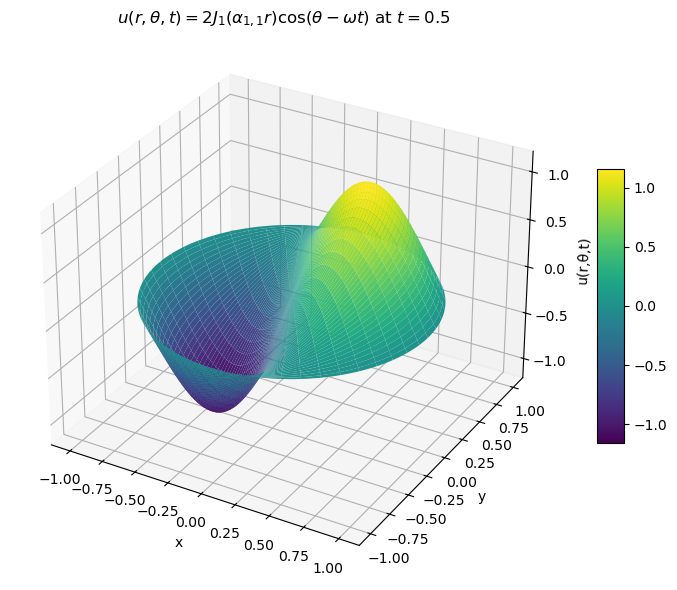

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Parameters
r = np.linspace(0, 1, 300)
theta = np.linspace(0, 2*np.pi, 300)
R, Theta = np.meshgrid(r, theta)

# First root of J1 (approximate)
alpha_11 = 3.8317
c = 1
omega = c  # Angular speed
t = 0.5     # Time

# Convert to Cartesian for plotting
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Bessel function J1 and solution at time t
from scipy.special import jv
Z = 2 * jv(1, alpha_11 * R) * np.cos(Theta - omega * t)

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 6))
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none')
ax.set_title(r'$u(r,\theta,t) = 2 J_1(\alpha_{1,1} r) \cos(\theta - \omega t)$ at $t=0.5$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(r,θ,t)')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


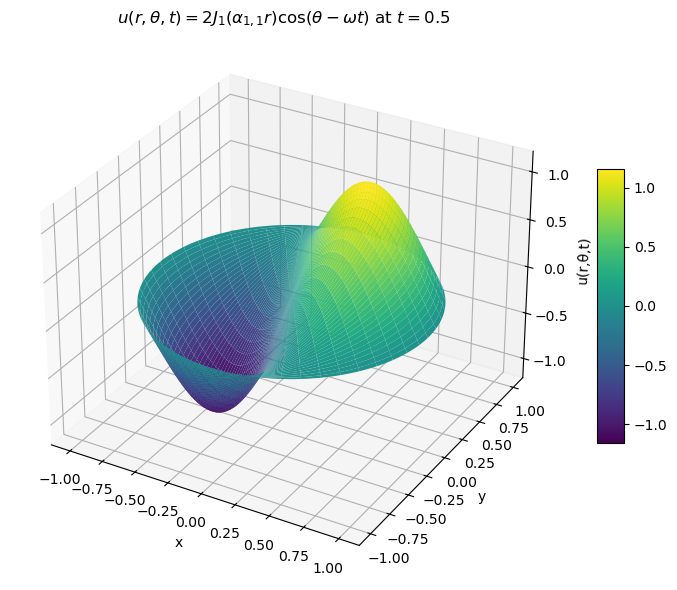

In [2]:
# Re-import necessary libraries after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import jv

# Parameters
r = np.linspace(0, 1, 300)
theta = np.linspace(0, 2*np.pi, 300)
R, Theta = np.meshgrid(r, theta)

# First root of J1 (approximate)
alpha_11 = 3.8317
c = 1
omega = c  # Angular speed
t = 0.5     # Time

# Convert to Cartesian for plotting
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Bessel function J1 and solution at time t
Z = 2 * jv(1, alpha_11 * R) * np.cos(Theta - omega * t)

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 6))
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none')
ax.set_title(r'$u(r,\theta,t) = 2 J_1(\alpha_{1,1} r) \cos(\theta - \omega t)$ at $t=0.5$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(r,θ,t)')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()


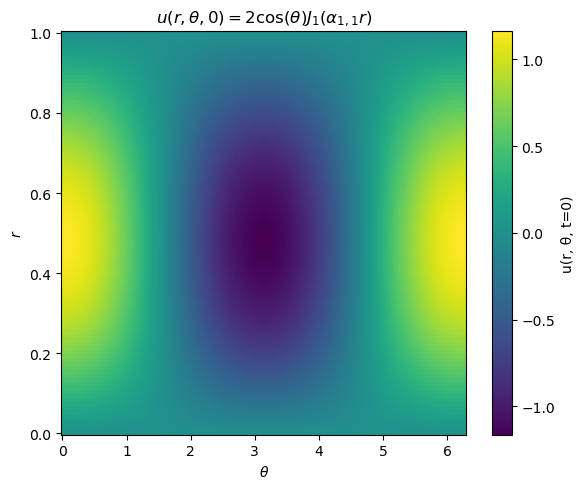

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1  # Bessel function J1

# Parameters
Nr = 100
Ntheta = 200
Nt = 10
c = 1.0
alpha = 3.8317  # First zero of J1

r = np.linspace(1e-3, 1.0, Nr)  # Avoid r=0 to prevent division by zero
theta = np.linspace(0, 2*np.pi, Ntheta)
t = np.linspace(0, 1.0, Nt)

R, Theta = np.meshgrid(r, theta, indexing='ij')  # Shape: (Nr, Ntheta)
omega = c / R  # Shape: (Nr, Ntheta)

# Function for analytical solution
def u_analytical(R, Theta, t, alpha=alpha, c=1.0):
    Theta_shifted = Theta + omega * t
    return 2 * np.cos(Theta_shifted) * j1(alpha * R)

# Generate dataset
u_dataset = np.zeros((Nt, Nr, Ntheta))
for i, ti in enumerate(t):
    u_dataset[i] = u_analytical(R, Theta, ti)

# Plot u(r, theta, t=0)
fig = plt.figure(figsize=(6, 5))
plt.pcolormesh(theta, r, u_dataset[0], shading='auto', cmap='viridis')
plt.colorbar(label='u(r, θ, t=0)')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$r$')
plt.title(r'$u(r, \theta, 0) = 2 \cos(\theta) J_1(\alpha_{1,1} r)$')
plt.tight_layout()
plt.show()


In [6]:
import numpy as np
from scipy.special import jn, jn_zeros
from scipy.integrate import simps

# Parameters
R = 1.0
alpha_11 = jn_zeros(1, 1)[0]  # First zero of J_1
theta = np.linspace(0, 2*np.pi, 200)
r = np.linspace(0, R, 200)
Theta, Rr = np.meshgrid(theta, r)

# Function u(r,theta)
J1_val = jn(1, alpha_11 * Rr)
u = 2 * np.cos(Theta) * J1_val

# Basis: J_1(alpha_11 * r) * e^{-i theta}
basis = J1_val * np.exp(-1j * Theta)

# Integrand: u * basis_conj * r
integrand = u * basis * Rr

# Integrate over r and theta using composite Simpson's rule
dr = r[1] - r[0]
dtheta = theta[1] - theta[0]

inner_r = simps(integrand, r, axis=0)
outer_theta = simps(inner_r, theta)

# Normalization
J1p_sq = jn(2, alpha_11)**2
coeff = (2 / (np.pi * R**2 * J1p_sq)) * outer_theta

print(f"Fourier–Bessel coefficient \\hat u_{{1,1}} ≈ {coeff:.4f}")


Fourier–Bessel coefficient \hat u_{1,1} ≈ 2.0000+0.0000j


Epoch 1, Loss = 0.319263
Epoch 2, Loss = 0.246518
Epoch 3, Loss = 0.150097
Epoch 4, Loss = 0.091925
Epoch 5, Loss = 0.060460
Epoch 6, Loss = 0.052777
Epoch 7, Loss = 0.043743
Epoch 8, Loss = 0.041229
Epoch 9, Loss = 0.033049
Epoch 10, Loss = 0.036777
Epoch 11, Loss = 0.039365
Epoch 12, Loss = 0.034106
Epoch 13, Loss = 0.025830
Epoch 14, Loss = 0.021027
Epoch 15, Loss = 0.022688
Epoch 16, Loss = 0.017818
Epoch 17, Loss = 0.018269
Epoch 18, Loss = 0.015808
Epoch 19, Loss = 0.014969
Epoch 20, Loss = 0.015837
Epoch 21, Loss = 0.015059
Epoch 22, Loss = 0.015872
Epoch 23, Loss = 0.019458
Epoch 24, Loss = 0.016358
Epoch 25, Loss = 0.013966
Epoch 26, Loss = 0.012151
Epoch 27, Loss = 0.014040
Epoch 28, Loss = 0.018189
Epoch 29, Loss = 0.016069
Epoch 30, Loss = 0.014682
Epoch 31, Loss = 0.013142
Epoch 32, Loss = 0.011202
Epoch 33, Loss = 0.011675
Epoch 34, Loss = 0.012733
Epoch 35, Loss = 0.017260
Epoch 36, Loss = 0.018113
Epoch 37, Loss = 0.019499
Epoch 38, Loss = 0.018875
Epoch 39, Loss = 0.01

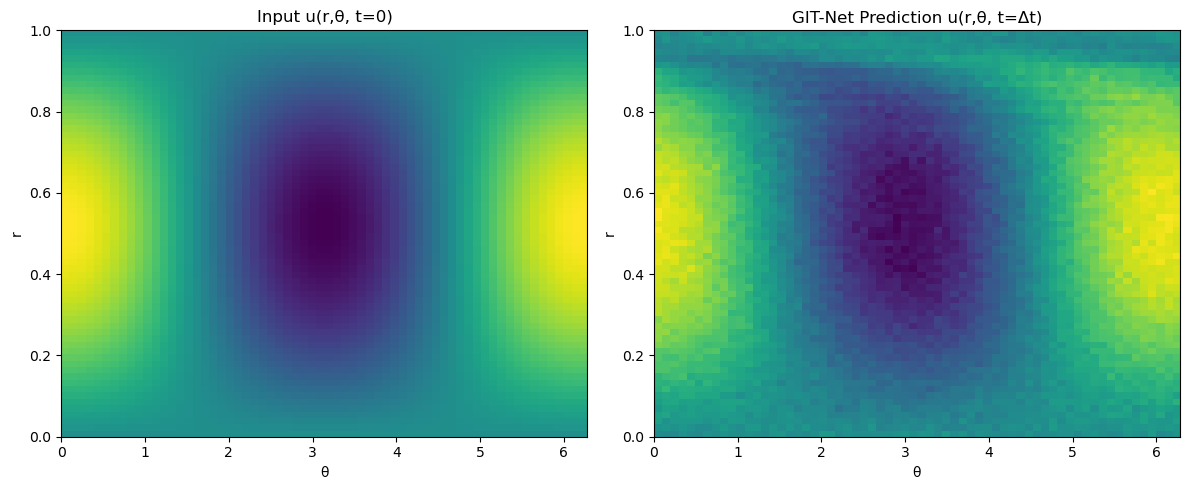

In [7]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from scipy.special import j1

# Parameters
Nr, Ntheta, Nt = 64, 64, 100
r = np.linspace(1e-3, 1, Nr)  # avoid division by zero
theta = np.linspace(0, 2 * np.pi, Ntheta)
t = np.linspace(0, 2 * np.pi, Nt)
alpha = 3.8317  # first root of J1
c = 1.0
R, Theta = np.meshgrid(r, theta, indexing='ij')

# Analytical solution u(r,theta,t)
def u_analytical(r, theta, t, alpha=alpha, c=1.0):
    omega = c / r
    u = np.zeros((len(r), len(theta)))
    for i in range(len(r)):
        shifted_theta = theta + omega[i] * t
        u[i, :] = 2 * np.cos(shifted_theta) * j1(alpha * r[i])
    return u

# Create dataset
u_data = np.zeros((Nt, Nr, Ntheta))
for i, ti in enumerate(t):
    u_data[i] = u_analytical(r, theta, ti)

# Prepare data for training
X = []
Y = []
for i in range(Nt - 1):
    X.append(u_data[i].flatten())
    Y.append(u_data[i + 1].flatten())
X = np.array(X)
Y = np.array(Y)

X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define GIT-Net architecture
class GITNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers=4):
        super(GITNet, self).__init__()
        self.lift = nn.Linear(input_dim, hidden_dim)
        self.layers = nn.ModuleList([nn.Sequential(nn.Linear(hidden_dim, hidden_dim), nn.ReLU()) for _ in range(n_layers)])
        self.decode = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.lift(x)
        for layer in self.layers:
            x = layer(x)
        return self.decode(x)

# Initialize model
model = GITNet(input_dim=Nr*Ntheta, hidden_dim=256, output_dim=Nr*Ntheta)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# Training loop
for epoch in range(100):
    total_loss = 0
    for xb, yb in dataloader:
        pred = model(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss = {total_loss/len(dataloader):.6f}")

# Predict future time step
with torch.no_grad():
    prediction = model(X_tensor[0:1]).reshape(Nr, Ntheta).numpy()

# Plot input and prediction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(Nr, Ntheta), extent=(0, 2*np.pi, 0, 1), aspect='auto')
plt.title("Input u(r,θ, t=0)")
plt.xlabel("θ"), plt.ylabel("r")

plt.subplot(1, 2, 2)
plt.imshow(prediction, extent=(0, 2*np.pi, 0, 1), aspect='auto')
plt.title("GIT-Net Prediction u(r,θ, t=Δt)")
plt.xlabel("θ"), plt.ylabel("r")

plt.tight_layout()
plt.show()
